# Generate Figures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
DIR = "/workspace/nflbigdatabowl2023"
sys.path.append(DIR)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from IPython.display import display

from src.visualization.interactive_pocket_area import (
    get_frame_plotter,
    get_play_pocket_and_timeline_plotter,
    get_play_pocket_and_timeline_plotter_multiple,
)
from src.visualization.formations import (
    plot_area_distributions,
    get_all_formation_distributions_plotter,
    get_clean_play_data,
    get_formation_distribution_plotter,
    get_play_metrics_with_area_data,
)
from src.visualization.helpers import unsnake
from src.visualization.logos import get_team_logos
from src.visualization.scatter import get_team_scatter_plotter, get_team_scatter_ranker

In [4]:
FIGPATH = "/workspace/nflbigdatabowl2023/data/figures"

In [5]:
team_logos = get_team_logos()

In [6]:
df_plays = pd.read_csv(f"{DIR}/data/raw/plays.csv")
df_plays = get_clean_play_data(df_plays)
df_tracking = pd.read_csv(f"{DIR}/data/processed/tracking_display.csv")
df_play_metrics = pd.read_csv(f"{DIR}/data/processed/play_metrics.csv")
df_play_metrics = get_play_metrics_with_area_data(df_play_metrics, df_plays)
df_areas = pd.read_csv(f"{DIR}/data/processed/pocket_areas.csv")
df_areas["pocket"] = df_areas["pocket"].apply(literal_eval)

## Figures

### Introduction

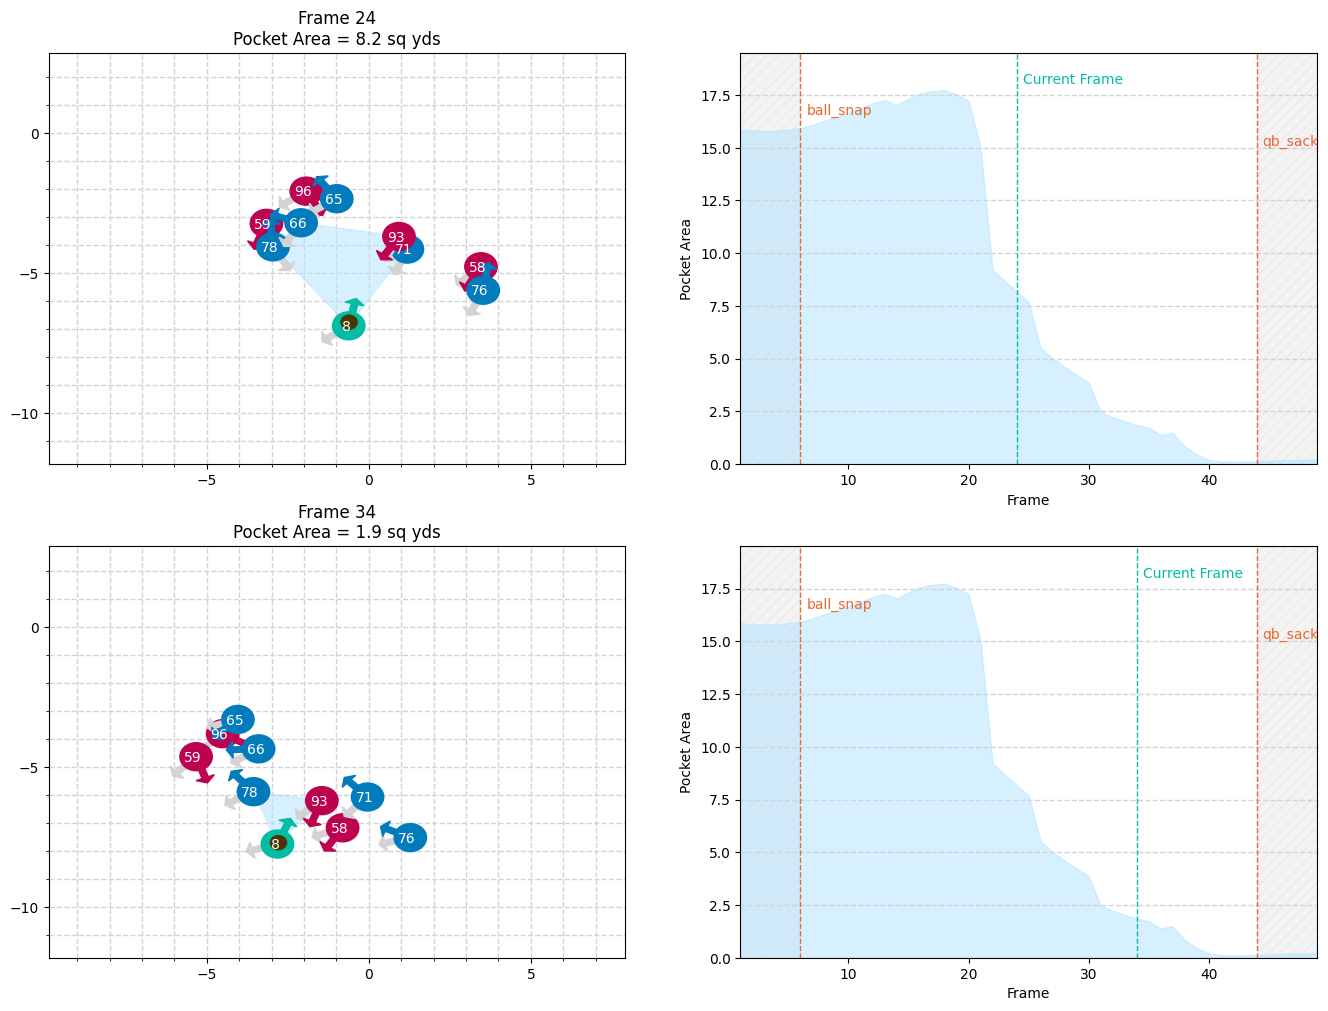

In [58]:
default_area = "adaptive_pocket_area"
play_query = "gameId == 2021091212 and playId == 421"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method=default_area)
plt.gcf().savefig(f"{FIGPATH}/figure_01.png")
plt.show()

### Voronoi

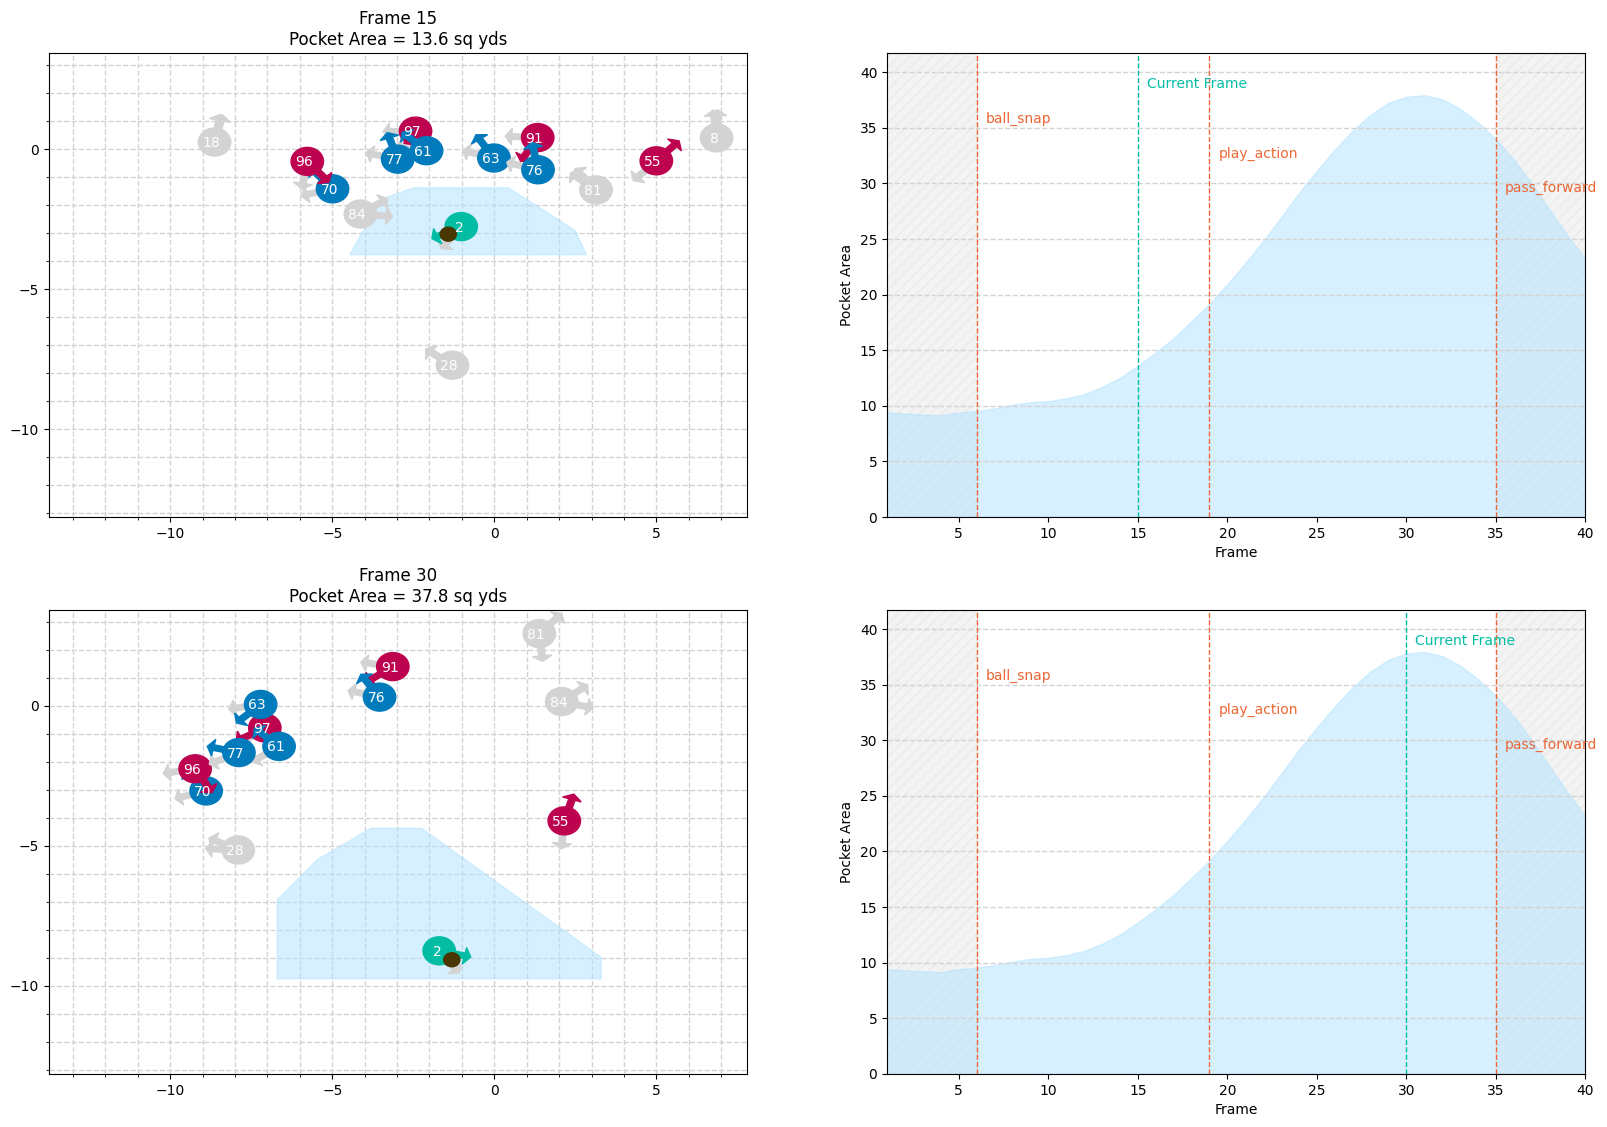

In [62]:
play_query = "gameId == 2021091200 and playId == 122"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=15, frame1=30, area_method="voronoi_rushers_only")
plt.gcf().savefig(f"{FIGPATH}/figure_02.png")
plt.show()

### Adaptive

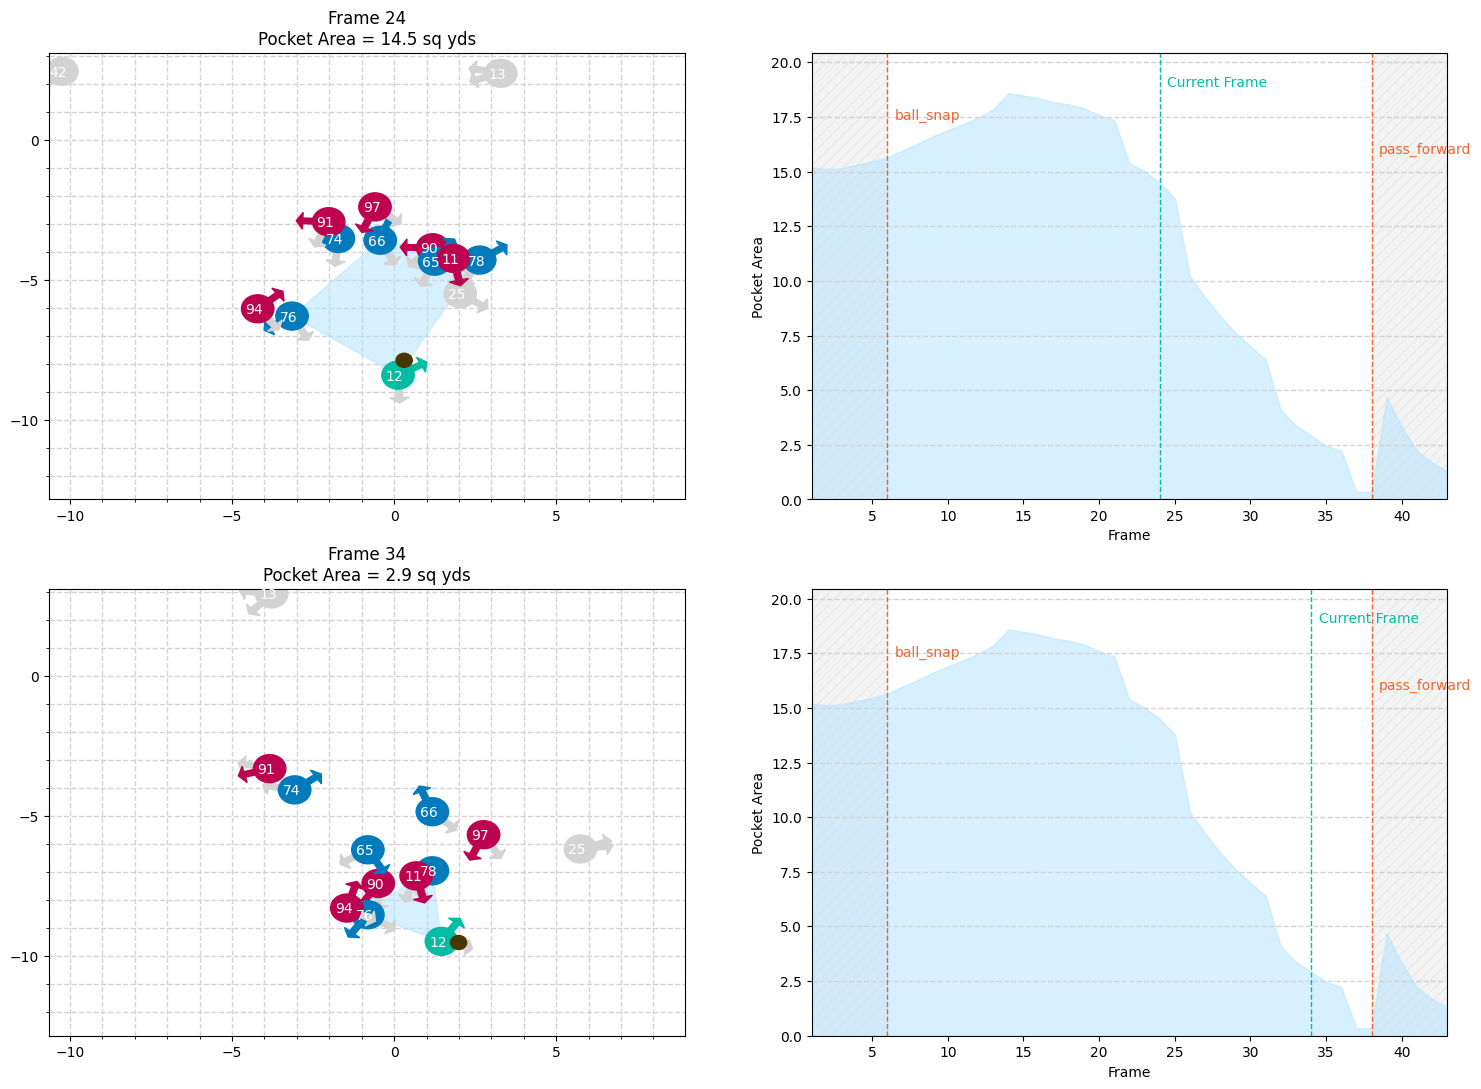

In [9]:
play_query = "gameId == 2021090900 and playId == 97"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method="adaptive_pocket_area")
plt.gcf().savefig(f"{FIGPATH}/figure_03.png")
plt.show()

### Team Rankings

In [10]:
default_area = "adaptive_pocket_area"
formation_query = "'SHOTGUN', 'EMPTY', 'SINGLEBACK', 'I FORM'"
rank_team_scatter = get_team_scatter_ranker(df_play_metrics)
df_team_ranking = rank_team_scatter(default_area, formation_query)
display(df_team_ranking)

,rank,team,plays,median_area,median_time_in_pocket,sack_rate
0,1,TB,260,15.604400,2.70,0.046154
1,2,PIT,197,15.260700,2.60,0.065990
2,3,LA,216,14.540350,2.90,0.032407
3,4,NYG,265,14.252600,2.80,0.056604
4,5,KC,281,13.915700,3.00,0.049822
5,6,CHI,221,13.849800,2.90,0.131222
6,7,DET,294,13.567995,2.80,0.071429
7,8,LAC,221,13.381500,2.80,0.058824
8,9,SEA,210,13.370250,2.90,0.104762
9,10,LV,222,13.341400,2.90,0.072072


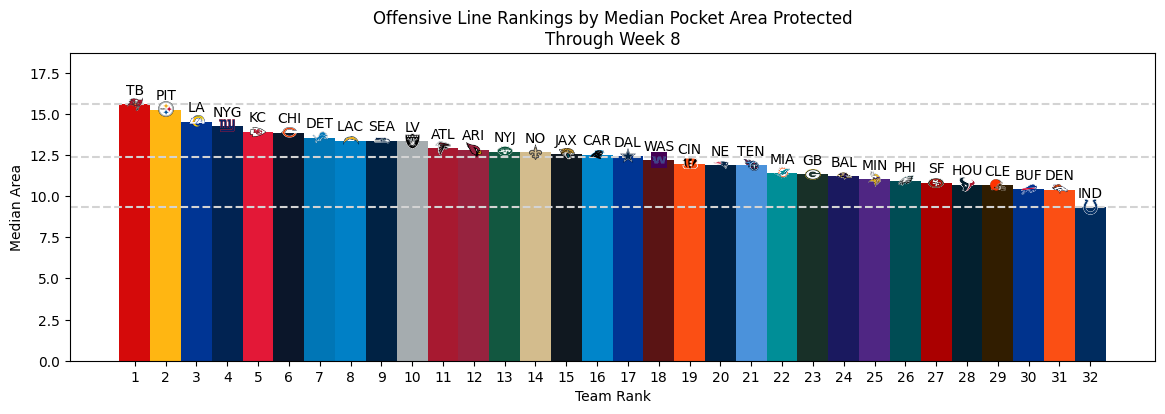

In [24]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage, TextArea


# https://teamcolorcodes.com/nfl-team-color-codes/
color_for_team = {
  "ARI": (151, 35, 63),
  "ATL": (167, 25, 48),
  "BAL": (26, 25, 95),
  "BUF": (0, 51, 141),
  "CAR": (0, 133, 202),
  "CHI": (11, 22, 42),
  "CIN": (251, 79, 20),
  "CLE": (49, 29, 0),
  "DAL": (0, 53, 148),
  "DEN": (251, 79, 20),
  "DET": (0, 118, 182),
  "GB":  (24, 48, 40),
  "HOU": (3, 32, 47),
  "IND": (0, 44, 95),
  "JAX": (16, 24, 32),
  "KC":  (227, 24, 55),
  "LAC": (0, 128, 198),
  "LA":  (0, 53, 148),
  "MIA": (0, 142, 151),
  "MIN": (79, 38, 131),
  "NE":  (0, 34, 68),
  "NO":  (211, 188, 141),
  "NYG": (1, 35, 82),
  "NYJ": (18, 87, 64),
  "LV":  (0, 0, 0),
  "PHI": (0, 76, 84),
  "PIT": (255, 182, 18),
  "SF":  (170, 0, 0),
  "SEA": (0, 34, 68),
  "TB":  (213, 10, 10),
  "TEN": (75, 146, 219),
  "WAS": (90, 20, 20),
  "LV":  (165, 172, 175),
}

fig, ax = plt.subplots(1, 1)
pal = []
for tup in df_team_ranking[["team", "rank","median_area"]].itertuples(index=False):
        team, x, y = tup
        if team_logos is not None:
            color = color_for_team[team]
            pal.append(color)
            team_logo = team_logos[team]
            logo = AnnotationBbox(
                OffsetImage(team_logo, zoom=0.35), xy=(x, y), frameon=False
            )
            ax.add_artist(logo)
        text = AnnotationBbox(
            TextArea(team),
            xy=(x, y),
            xybox=(0, 10),
            xycoords="data",
            boxcoords="offset points",
            fontsize=2,
            frameon=False,
        )
        ax.add_artist(text)
pal = np.array(pal) / 255.0
bar_width = 1
ax.bar(
    x=df_team_ranking["rank"],
    height=df_team_ranking["median_area"],
    width=bar_width,
    color=pal,
)
ax.axhline(df_team_ranking["median_area"].max(), linestyle="--", color="lightgray")
ax.axhline(df_team_ranking["median_area"].mean(), linestyle="--", color="lightgray")
ax.axhline(df_team_ranking["median_area"].min(), linestyle="--", color="lightgray")
ax.set_ylim(0, 1.2 * df_team_ranking["median_area"].max())
ax.set_xticks(np.arange(1, len(df_team_ranking) + 1, 1))
ax.set_xlabel("Team Rank")
ax.set_ylabel("Median Area")
ax.set_title("Offensive Line Rankings by Median Pocket Area Protected\nThrough Week 8")
fig.set_size_inches(14, 4)
plt.gcf().savefig(f"{FIGPATH}/figure_04.png")
plt.show()

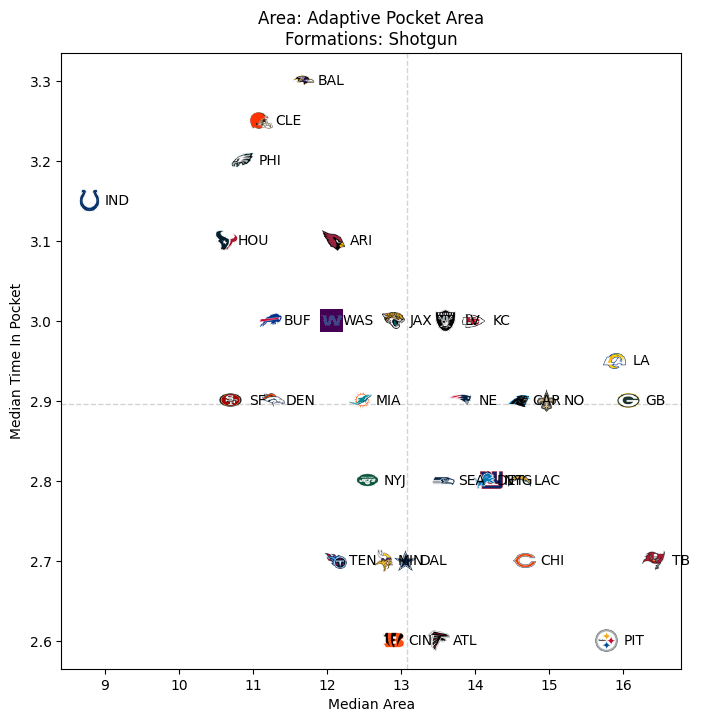

In [56]:
plot_team_scatter = get_team_scatter_plotter(df_play_metrics, team_logos)
plot_team_scatter(default_area, "'SHOTGUN'", "median_area", "median_time_in_pocket")
plt.gcf().savefig(f"{FIGPATH}/figure_05.png")
plt.show()

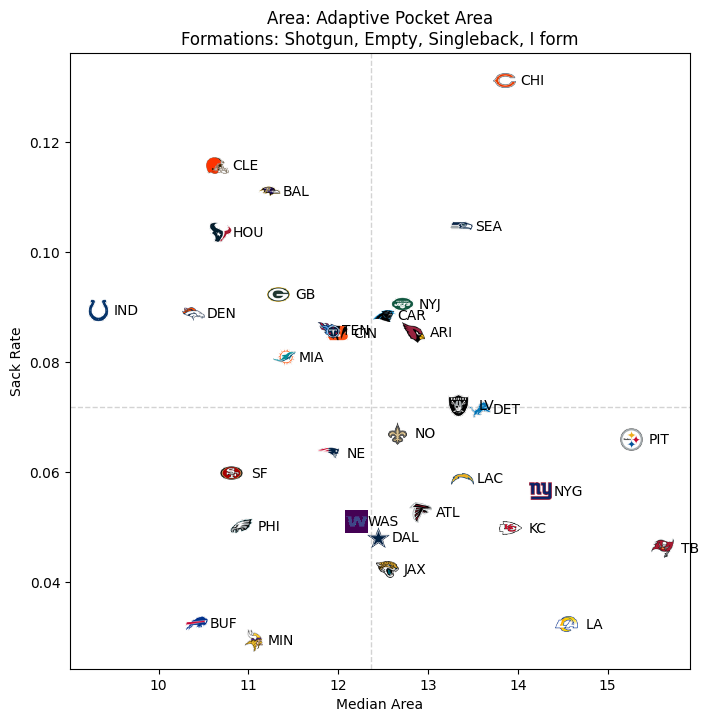

In [13]:
plot_team_scatter(default_area, formation_query, "median_area", "sack_rate")
plt.gcf().savefig(f"{FIGPATH}/figure_06.png")
plt.show()

In [14]:
# plot_team_scatter(default_area, formation_query, "median_area", "median_opponent_area")
# plt.gcf().savefig(f"{FIGPATH}/figure_07.png")
# plt.show()

### Heatmaps

In [15]:
from matplotlib.patches import Polygon as PolygonPatch
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.metrics.pocket_area.helpers import vertices_from_shape
from src.visualization.heatmaps import (
    get_pocket_shapes_for_area,
    get_play_pocket,
    get_heatmap_from_pocket_shapes,
)

In [50]:
show_cols = [
    "gameId",
    "playId",
    "frameId",
    "method",
    "possessionTeam",
    "down",
    "yardsToGo",
]
df_pocket = get_play_pocket(df_play_metrics, df_areas, df_plays, window_size_frames=10)
df_pocket[show_cols].head(10)

,gameId,playId,frameId,method,possessionTeam,down,yardsToGo
0,2021090900,97,28,adaptive_pocket_area,TB,3,2
2,2021090900,137,22,adaptive_pocket_area,DAL,1,10
4,2021090900,187,16,adaptive_pocket_area,DAL,2,6
6,2021090900,282,28,adaptive_pocket_area,DAL,1,10
8,2021090900,349,22,adaptive_pocket_area,DAL,3,15
10,2021090900,456,21,adaptive_pocket_area,TB,2,10
12,2021090900,480,30,adaptive_pocket_area,TB,1,10
14,2021090900,509,23,adaptive_pocket_area,TB,1,10
16,2021090900,559,20,adaptive_pocket_area,TB,2,7
18,2021090900,583,16,adaptive_pocket_area,TB,1,5


In [51]:
heatmap_query = (
    "possessionTeam == 'TB' "
    "and offenseFormation == 'SHOTGUN' "
)
df_pocket_query = df_pocket.query(heatmap_query)
len(df_pocket_query)

172

In [52]:
pocket_shapes = get_pocket_shapes_for_area(df_pocket_query, default_area)

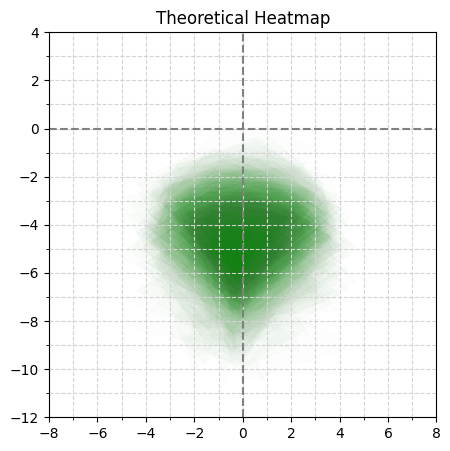

In [53]:
fig, ax = plt.subplots(1, 1)

alpha = 0.01
for shape in pocket_shapes:
    vertices = vertices_from_shape(shape)
    patch = PolygonPatch(vertices, color="green", alpha=alpha)
    ax.add_patch(patch)

ax.set_title("Theoretical Heatmap")
ax.set_xlim(-8, 8)
ax.set_ylim(-12, 4)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()

In [54]:
bin_size = 0.25
heatmap, extent = get_heatmap_from_pocket_shapes(
    pocket_shapes,
    bin_start=-10,
    bin_end=10,
    bin_size=bin_size,
    progress=True,
)

  0%|          | 0/6561 [00:00<?, ?it/s]

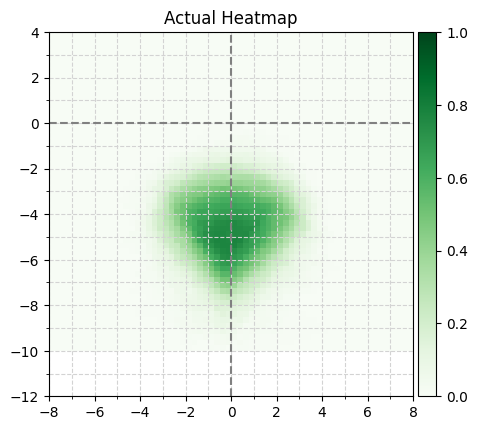

In [55]:
fig, ax = plt.subplots(1, 1)

im = ax.imshow(
    heatmap,
    extent=extent,
    cmap="Greens",
    vmin=0,
    vmax=1,
    origin="lower"
)

# Colorbar on ax code based on : https://stackoverflow.com/a/49037495
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax, orientation="vertical")

ax.set_title("Actual Heatmap")
ax.set_xlim(-8, 8)
ax.set_ylim(-12, 4)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()

### Appendix

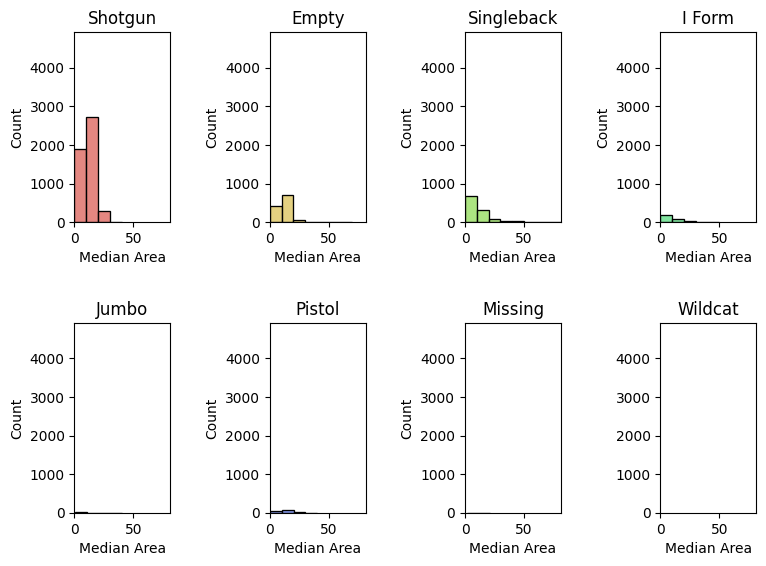

In [22]:
formations = list(df_play_metrics["offenseFormation"].unique())
plot_all_formation_distributions = get_all_formation_distributions_plotter(df_play_metrics, formations)
plot_all_formation_distributions(default_area)
plt.gcf().savefig(f"{FIGPATH}/appendix_01.png")
plt.show()

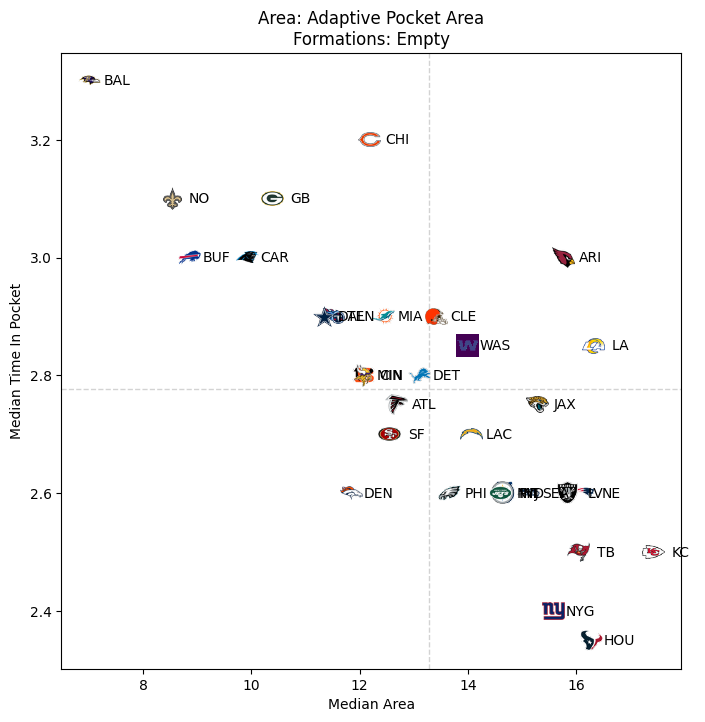

In [23]:
plot_team_scatter(default_area, "'EMPTY'", "median_area", "median_time_in_pocket")
plt.gcf().savefig(f"{FIGPATH}/appendix_02.png")
plt.show()